In [2]:
import sys
import os
from one.api import ONE
from pathlib import Path
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns    
from utils.load_meso_session import MesoscopeSession
# Load the session data
one = ONE()
SESSION_INDEX = 0
session = MesoscopeSession.from_csv(one, '../good_mesoscope_sessions_final.csv', SESSION_INDEX, True)


In [3]:
session

MesoscopeSession(eid='61f260e7-b5d3-4865-a577-bcfc53fda8a8', subject='SP066', date='2025-04-09T12:10:56.318000', duration_hours=1.0843897222222223, raw_activity=True, task_protocol='_iblrig_tasks_biasedChoiceWorld8.27.6/_sp_passiveVideo8.27.6', fovs={'FOV_00': FOVData(fov_name='FOV_00', collection='alf/FOV_00', neuropil_activity=array([[1578.2823 ,  601.4698 , 2026.4932 , ..., 1246.8341 ,  726.13324,
        1517.6796 ],
       [1489.0696 ,  533.5381 , 1849.9391 , ..., 1053.5421 ,  584.731  ,
        1420.0386 ],
       [1347.0576 ,  523.16797, 1756.4891 , ...,  990.18317,  578.47943,
        1243.8932 ],
       ...,
       [1733.3916 ,  554.4068 , 1945.7917 , ..., 1363.7203 ,  519.63763,
        1449.3468 ],
       [1670.1411 ,  520.853  , 2141.1    , ..., 1343.5248 ,  521.0535 ,
        1454.4729 ],
       [1593.493  ,  565.34644, 2074.3064 , ..., 1446.396  ,  540.0286 ,
        1341.6217 ]], dtype=float32), roi_activity=array([[ 5829.508  ,   813.8649 , 24296.914  , ...,   963.1824 

In [4]:
activity_matrix, timestamps = session.get_activity_matrix()
dff_activity_matrix, timestamps_2 = session.get_dff_activity_matrix()

In [5]:
activity_matrix.mean()

np.float32(1413.281)

In [6]:
print(activity_matrix.max(), activity_matrix.min())

28183.363 -532.0


In [7]:
print(dff_activity_matrix.max(), dff_activity_matrix.min())

11374.15 -2277.8142


<Axes: >

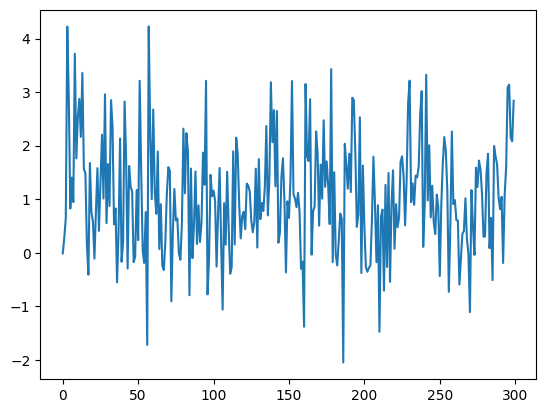

In [8]:
sns.lineplot(dff_activity_matrix[0:300, 2000])

<Axes: >

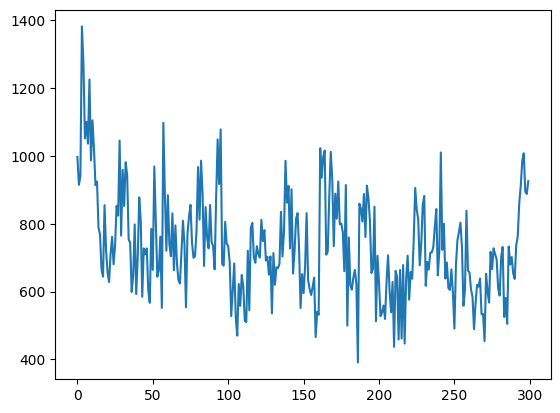

In [9]:
sns.lineplot(activity_matrix[0:300, 2000])

In [10]:
# In your notebook, after loading the data:
from analyze_normalization import recommend_normalization, plot_normalization_comparison, analyze_activity_matrices
# Run the analysis
exec(open('analyze_normalization.py').read())

# Perform comprehensive analysis
stats_dict = analyze_activity_matrices(activity_matrix,
dff_activity_matrix, timestamps, timestamps_2)

# Create visualizations
fig = plot_normalization_comparison(activity_matrix, dff_activity_matrix, stats_dict)

# Get recommendations
recommend_normalization(stats_dict)

NEURAL ACTIVITY ANALYSIS FOR ML NORMALIZATION

BASIC STATISTICS:
Raw activity shape: (19081, 7673)
ΔF/F activity shape: (19081, 7673)
Timestamps match: True

RAW ACTIVITY STATISTICS:


  Mean: 1413.2810
  Std: 832.9438
  Min: -532.0000
  Max: 28183.3633
  Median: 1296.1783
  25th percentile: 875.2443
  75th percentile: 1791.5298
  95th percentile: 2689.5544


KeyboardInterrupt: 